In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [2]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### A boxplot for the "Median value of owner-occupied homes"

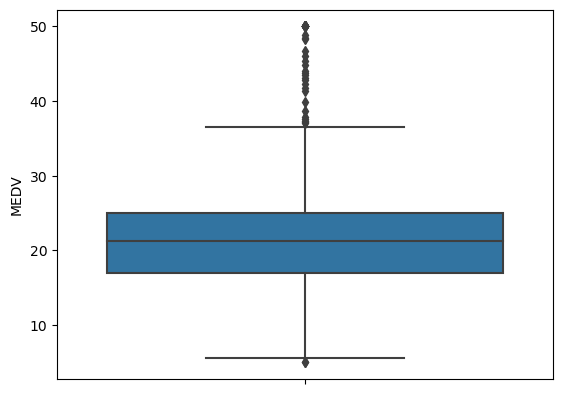

In [3]:
ax = sns.boxplot(y='MEDV', data= boston_df)

In [5]:
Mean = boston_df['MEDV'].mean()
Min = boston_df['MEDV'].min()
Max = boston_df['MEDV'].max()

print(Mean, Min, Max)

22.532806324110698 5.0 50.0


### a  bar plot for the Charles river variable

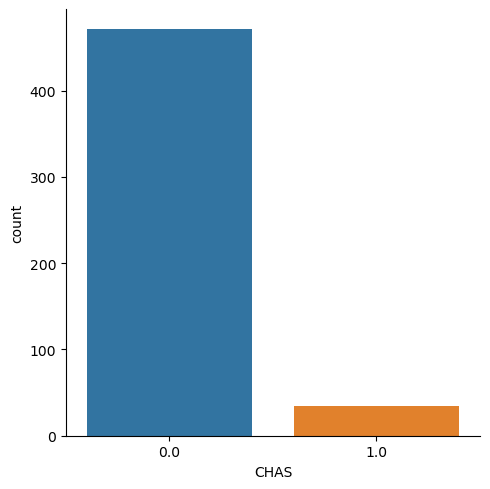

In [2]:
sns.catplot(x= 'CHAS', kind = 'count', data = boston_df)

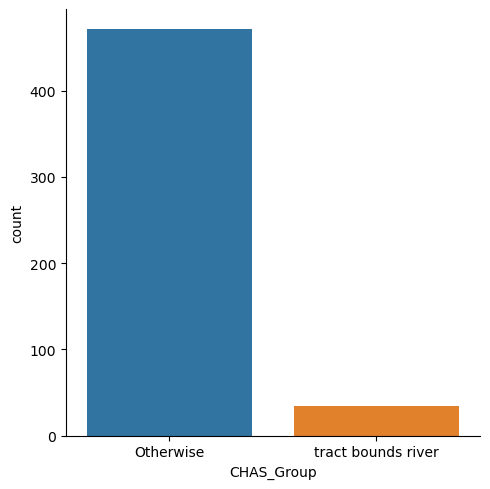

In [10]:
boston_df.loc[(boston_df['CHAS']>=1),'CHAS_Group'] = 'tract bounds river'
boston_df.loc[(boston_df['CHAS']<=0),'CHAS_Group'] = 'Otherwise'
Barplot = boston_df['CHAS_Group'].value_counts().reset_index()

sns.barplot(x= 'index', y = 'CHAS_Group', data = Barplot)
plt.show()

### A boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

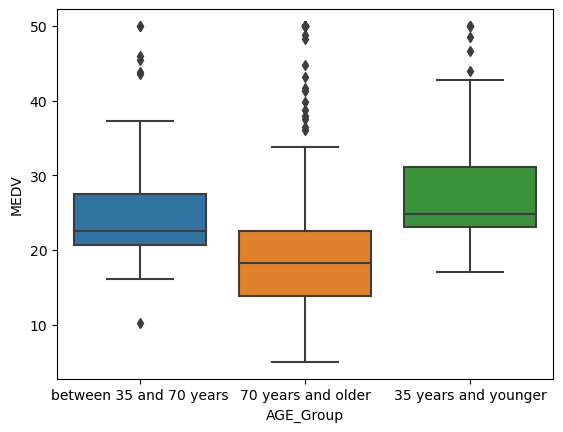

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35 ), 'AGE_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70 ), 'AGE_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70 ), 'AGE_Group'] = '70 years and older'

sns.boxplot(x= 'AGE_Group', y= 'MEDV', data = boston_df)
plt.show()

### A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

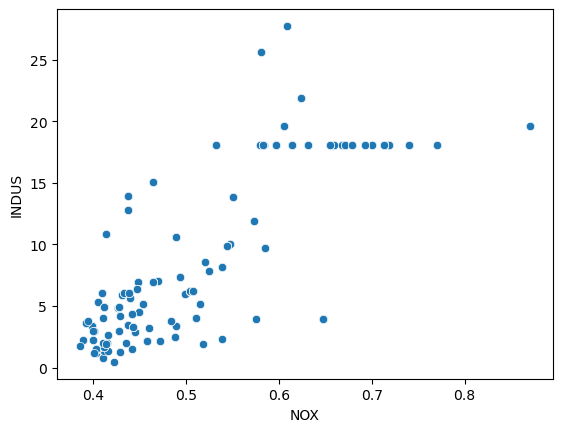

In [4]:
sns.scatterplot(x='NOX', y='INDUS', data = boston_df)
plt.show()

There is a linear relationship between NOX and INDUS

### A histogram for the pupil to teacher ratio variable

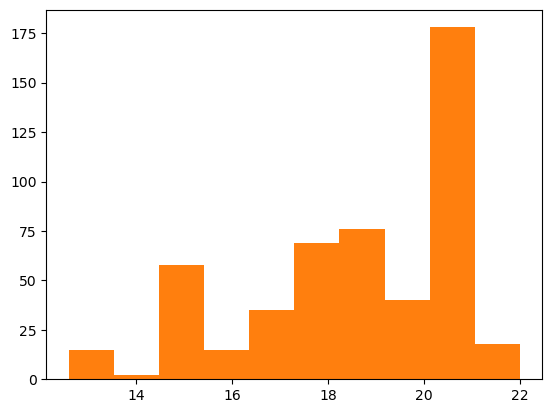

In [14]:
plt.hist(boston_df['PTRATIO'])
plt.show()

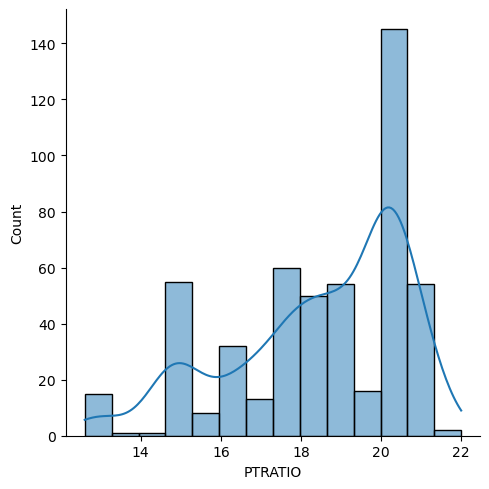

In [15]:
sns.displot(boston_df['PTRATIO'], kde = True)
plt.show()

### Is there a significant difference in the median value of houses bounded by the Charles river or not?

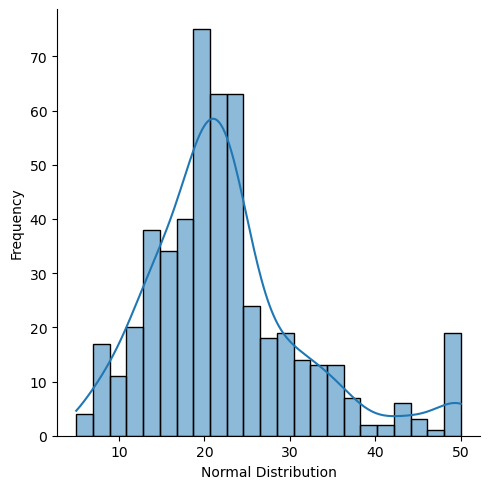

In [9]:
ax= sns.displot(boston_df['MEDV'], kde = True,)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_Group']== 'tract bounds river']['MEDV'],
                     boston_df[boston_df['CHAS_Group'] == 'Otherwise']['MEDV'], equal_var = True)


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [13]:
# As CHAS variable is already incoded 1 for truct bounds river so we don't make any dammy variable
X= boston_df['CHAS']

y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           7.39e-05
Time:                        08:29:49   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### According to the t-test and p-value < 0.05, There is a significant difference between CHAS 'tract bounds river' and MEDV

### Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

In [15]:
thfive_lower = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
thfive_seventy = boston_df[boston_df['AGE_Group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thfive_lower, thfive_seventy, seventy_older)
print("F_Statistics :{0}, P-Value; {1}".format(f_statistic, p_value))


F_Statistics :36.40764999196599, P-Value; 1.7105011022702984e-15


##### Yes, there is a difference in median values of houses of each proportion of owner-occupied units built before 1940

### Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

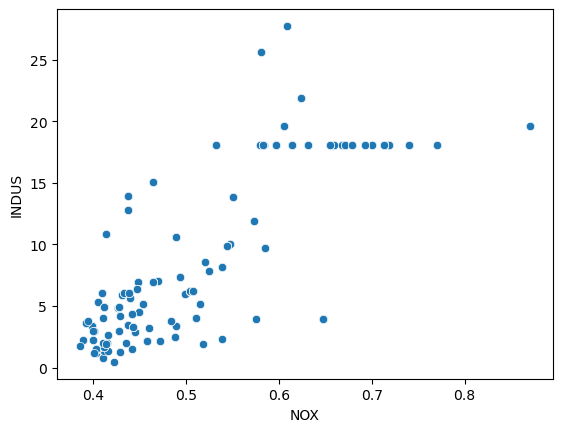

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)


In [17]:
sns.scatterplot(x='NOX', y='INDUS', data = boston_df)
plt.show()

ax = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(ax)

##### As p-value <0.05 and statistic is 0.76, there is a significant strong positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [19]:
#As both are continuous variable

X= boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        09:02:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### As p-value <0.05, DIS coefficient is 1.0916, and constant is 18.3901 so the equation would be 
y= 18.3901 + 1.0916*DIS